### Treść

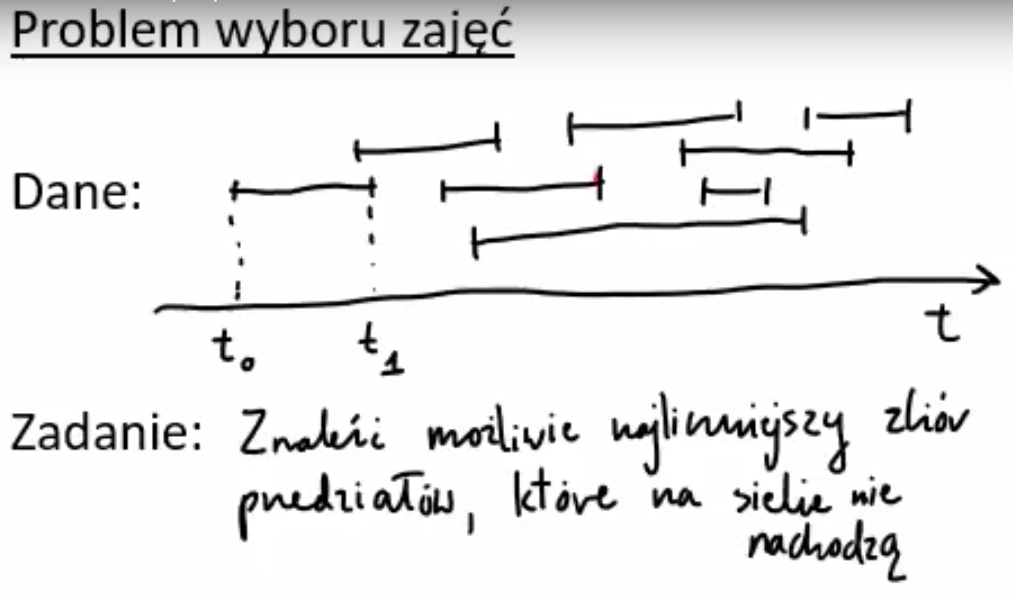

### Omówienie problemu

Ogólne omówienie podejścia zachłannego:
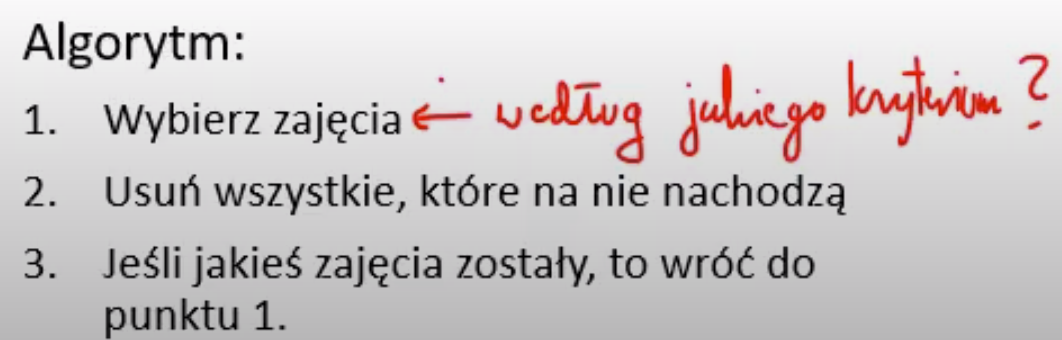

Omówienie przykładowych nieprawidłowych algorytmów oraz rozwiązania poprawnego (patrz pkt. 4. i 5. - to są tak naprawdę dwa takie same algorytmy, tylko pierwszy z nich idzie zgodnie z kierunkiem osi czasu - przegląda kolejene zajęcia od początku do końca, a drugi prawidłowy (5. spośród wymienionych) biegnie od końca osi czasu - cofa się w czasie):
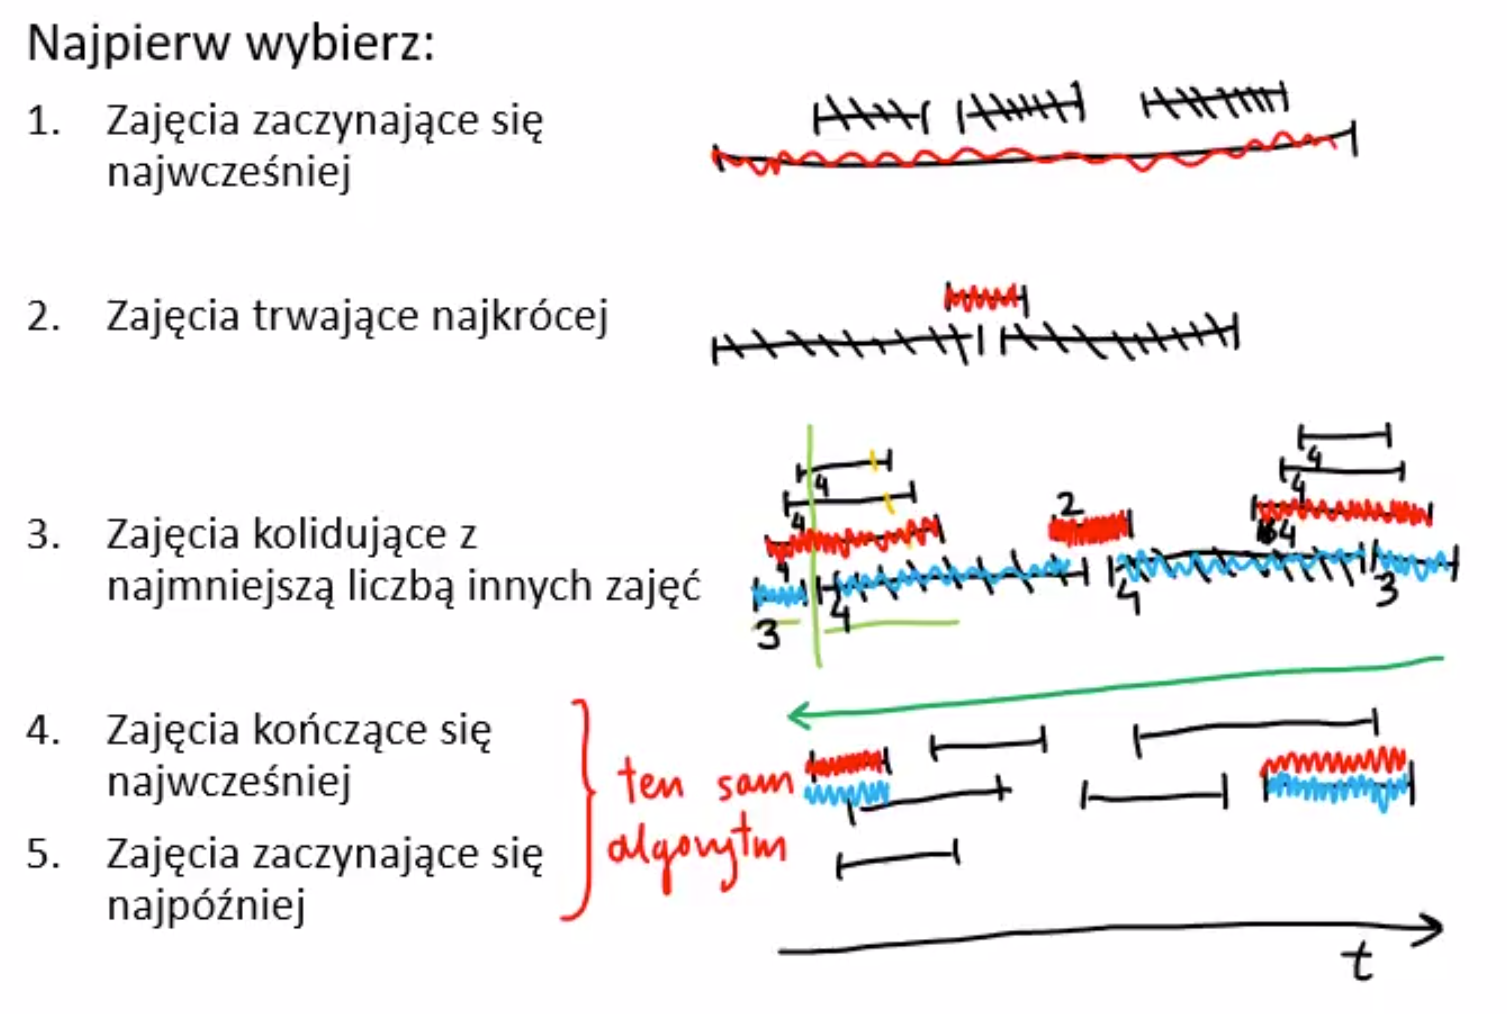

### Dowód poprawności algorytmu 4. (i 5.)

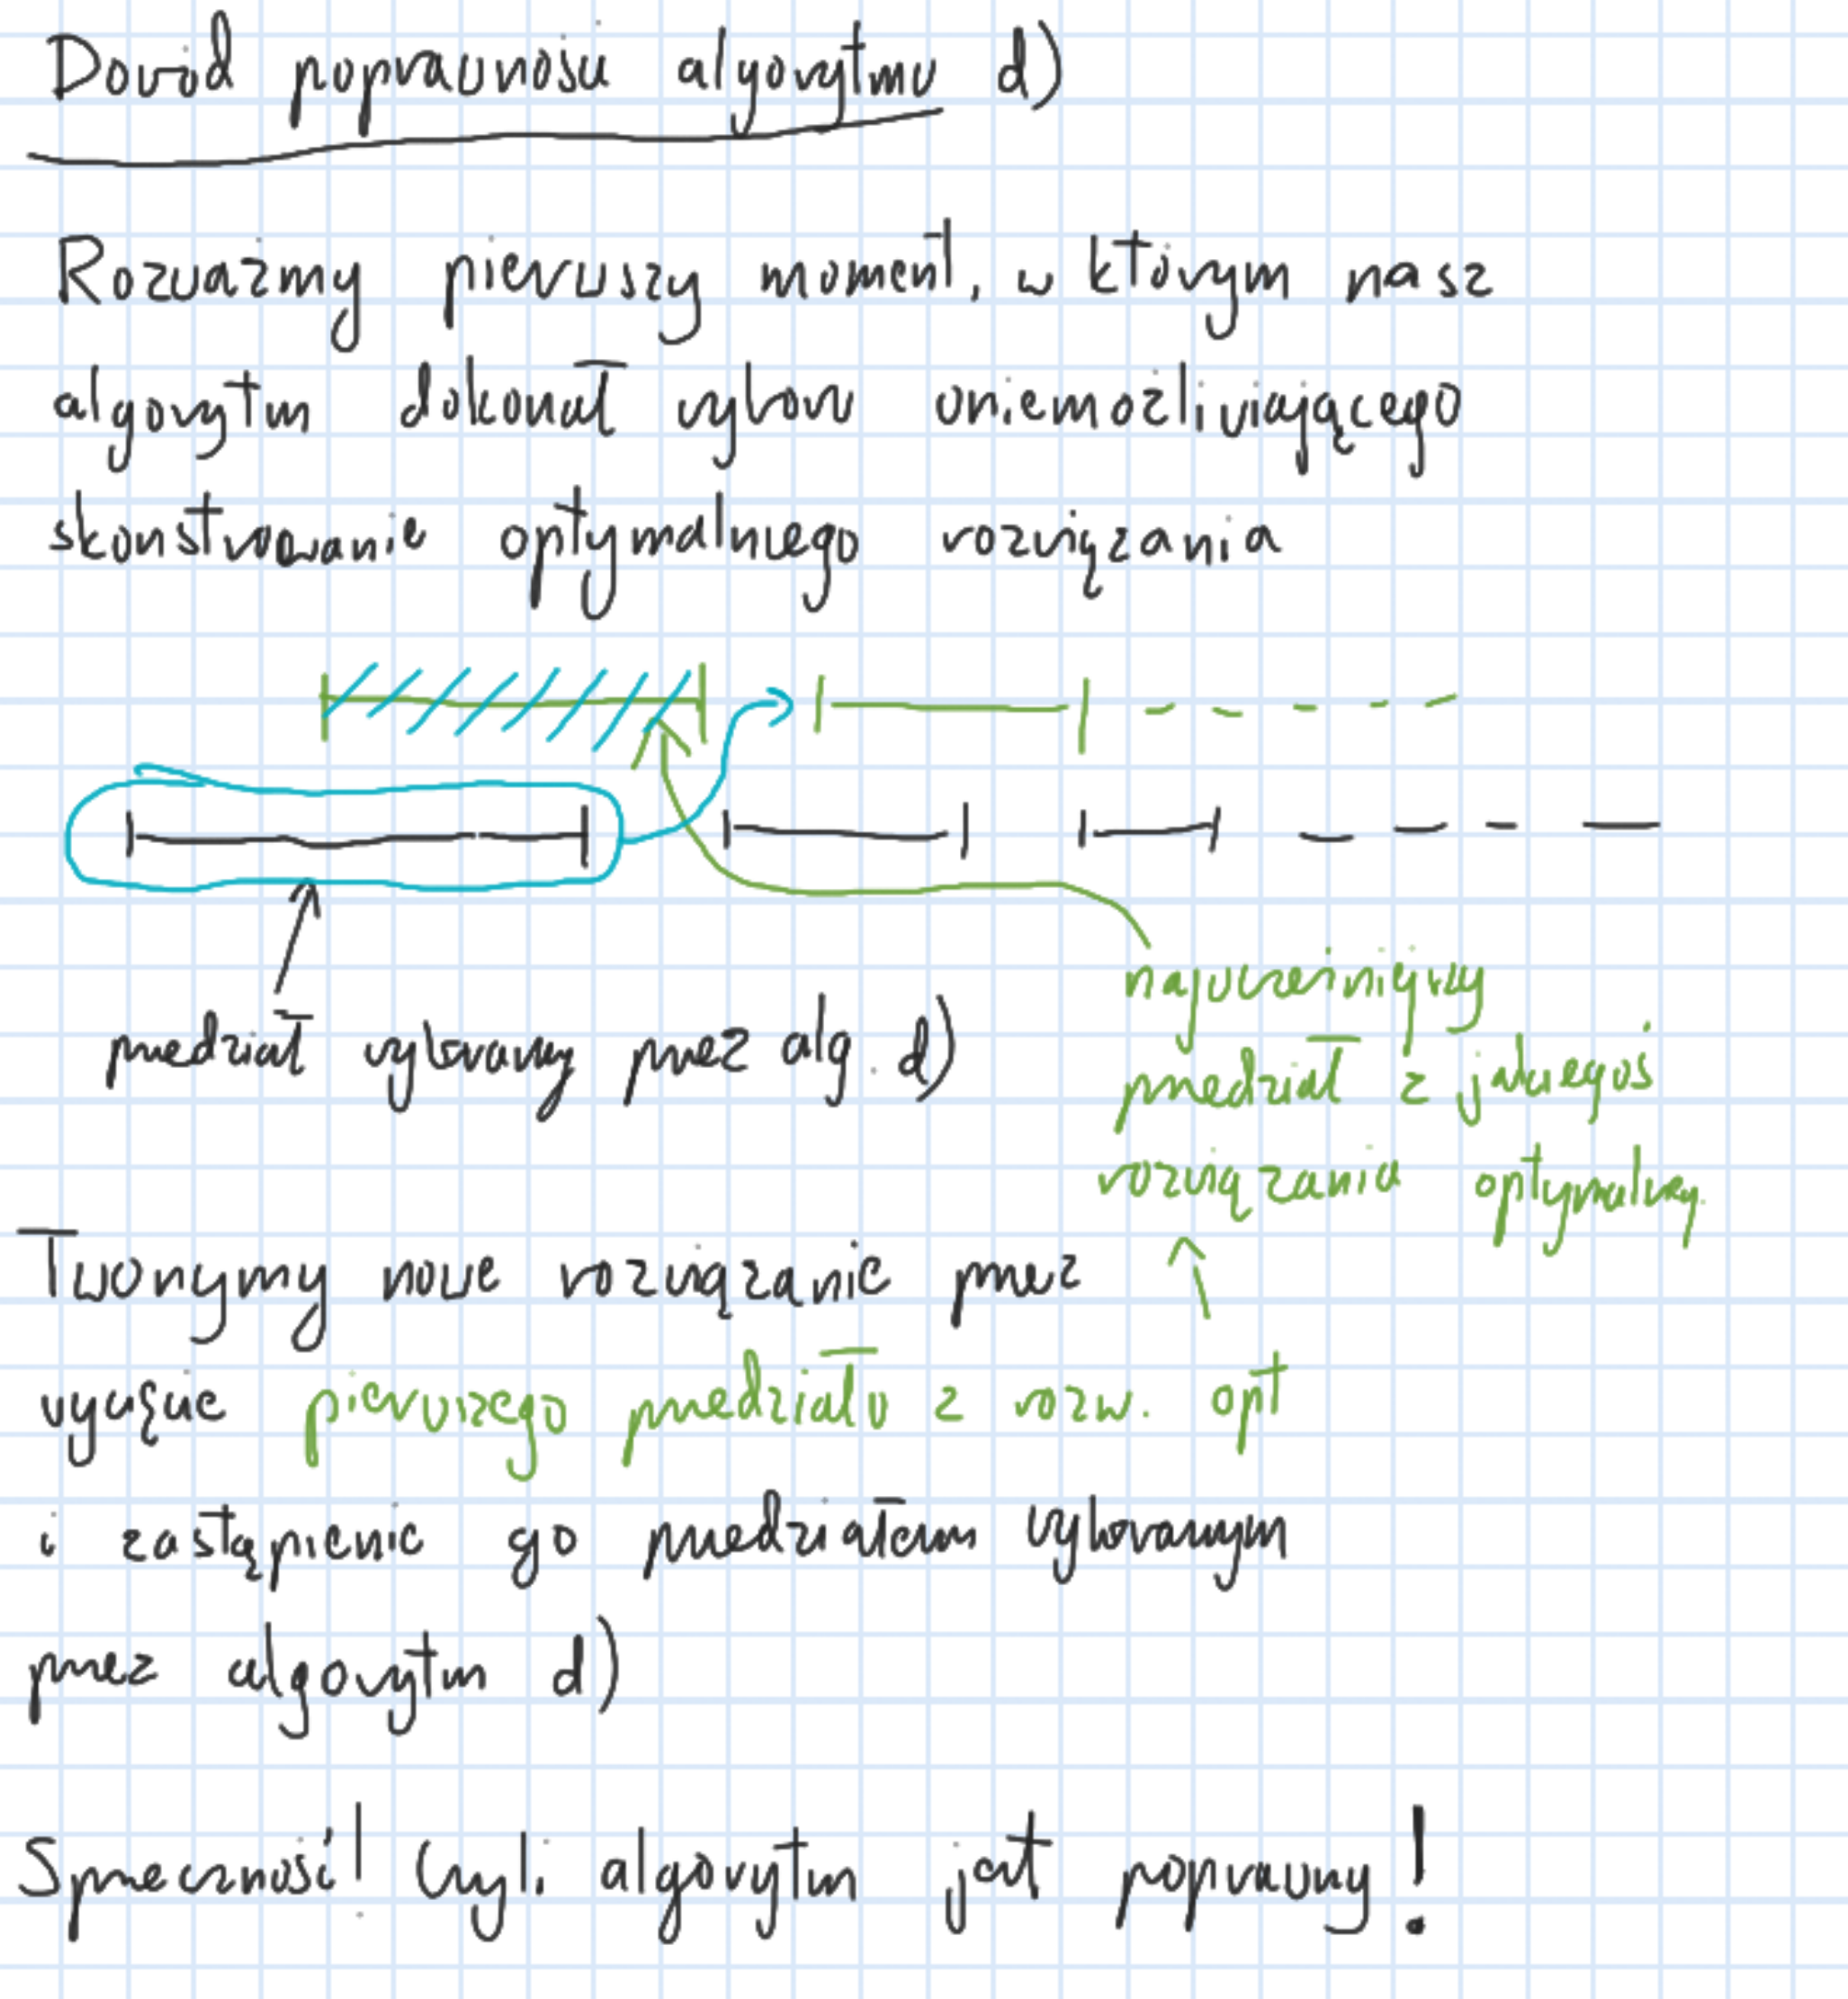

### Omówienie algorytmu

Zaimplementujemy wersję 4. algorytmu zachłannego, ponieważ wydaje się ona bardziej naturalna. Opis jest prosty, ponieważ, skoro chcemy zawsze wybierać przedział, który kończy się najwcześniej (i oczywiście nie nachodzi na poprzednio wybrany), musimy najpierw posortować przedziały w taki sposób, że współrzędne końców tych przedziałów będą uporządkowane w sposób niemalejący (zwykłe sortowanie przedziałów po drugiej współrzędnej). W kolejnym kroku wybieramy pierwszy przedział z tablicy posortowanych przedziałów (zawsze bierzemy pierwszy do rozwiązania), a następnie szukamy pierwszego przedziału, który nie nachodzi na przedział poprzednio przez nas wybrany (tzn. przechodzimy liniowo przez tablicę przedziałów do momentu, w którym napotkamy pierwszy przedział, którego początkowa współrzędna nie nachodzi na poprzedni dodany do rozwiązania przedział). Jeżeli znajdziemy taki przedział, dodajemy go do rozwiązania i postępujemy dalej w sposób wyżej opisany do momentu, w którym skończą nam się przedziały do rozpatrywania.

### Implementacja algorytmu

In [1]:
def quick_sort(arr, *, fn=lambda x: x):
    _quick_sort(arr, 0, len(arr) - 1, fn)
    

def _quick_sort(arr, left_idx, right_idx, fn):
    while left_idx < right_idx:
        pivot_position = _partition(arr, left_idx, right_idx, fn)

        if pivot_position - left_idx < right_idx - pivot_position:
            _quick_sort(arr, left_idx, pivot_position - 1, fn)
            left_idx = pivot_position + 1
        else:
            _quick_sort(arr, pivot_position + 1, right_idx, fn)
            right_idx = pivot_position - 1
        
        
def _partition(arr, left_idx, right_idx, fn):
    pivot = fn(arr[right_idx])
    
    # Partition an array into 2 subarrays of elements lower than
    # pivot and of elements greater than a pivot
    i = left_idx
    for j in range(left_idx, right_idx):
        if fn(arr[j]) < pivot:
            _swap(arr, i, j)
            i += 1
    
    # Place a pivot element on its destination index
    _swap(arr, i, right_idx)
    
    return i  # Return a pivot position after the last swap

    
def _swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]
    
    
def task_management(spans: 'array of time spans'):
    # Sort all spans by their second coordinate in a non-decreasing order
    quick_sort(spans, fn=lambda span: span[1])
    # Loop over all the sorted spans and choose only these which end faster
    # than the other remaining spans
    n = len(spans)
    prev = spans[0]
    result = [prev]
    for i in range(1, n):
        if spans[i][0] > prev[1]:
            result.append(spans[i])
            prev = spans[i]
            
    return result

###### Kilka testów (4 przykłady z ilustracji przy omówieniu problemu)

In [2]:
A = [[5.22, 11.55], [8.45, 11.05], [5.35, 6.20], [7.00, 8.15]]

print(task_management(A))

[[5.35, 6.2], [7.0, 8.15], [8.45, 11.05]]


In [3]:
B = [[3.15, 6.00], [9.05, 11.48], [5.52, 10.30]]

print(task_management(B))

[[3.15, 6.0], [9.05, 11.48]]


In [4]:
C = [[16.32, 18.12], [1.50, 2.43], [6.54, 9.10], [16.10, 18.25], [1.45, 2.50], [1.32, 2.55], 
     [0.42, 2.05], [2.10, 6.30], [8.55, 17.22], [15.55, 19.00], [17.35, 20.05]]

print(task_management(C))

[[0.42, 2.05], [2.1, 6.3], [6.54, 9.1], [16.32, 18.12]]


In [5]:
D = [[3.15, 8.04], [2.05, 5.42], [9.05, 11.33], [0.25, 2.24], [10.25, 16.42], [12.05, 17.55], [1.12, 3.45]]

print(task_management(D))

[[0.25, 2.24], [3.15, 8.04], [9.05, 11.33], [12.05, 17.55]]
